## IS Seminary 2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Task 1 (Preprocessing the data)

In [7]:
def convert_txt_to_csv(txt_file_path, csv_file_path):             ### it will convert the txt file to csv file, easier for pandas
    with open(txt_file_path, 'r') as file:
        lines = file.readlines()

    data = [eval(line.strip()) for line in lines]
    df = pd.DataFrame(data)

    df.to_csv(csv_file_path, index=False)
    return df

txt_file_path = "emotion_dataset.txt"
csv_file_path = "emotion.csv"
emotion = convert_txt_to_csv(txt_file_path, csv_file_path)
print(emotion.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [8]:
### check missing values
emotion = pd.read_csv("emotion.csv")
emotion.isnull().sum()

text     0
label    0
dtype: int64

<Axes: xlabel='label'>

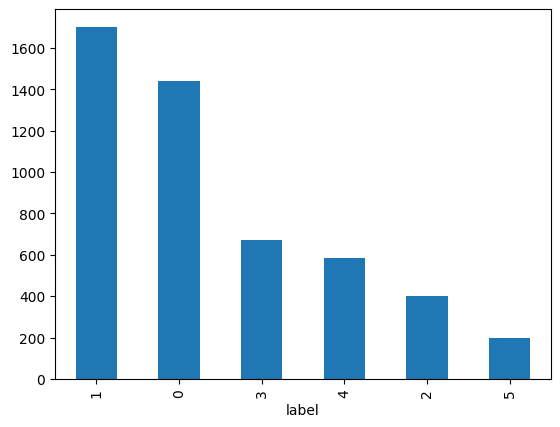

In [9]:
emotion['label'].value_counts().plot(kind='bar')

<Axes: xlabel='text length', ylabel='Frequency'>

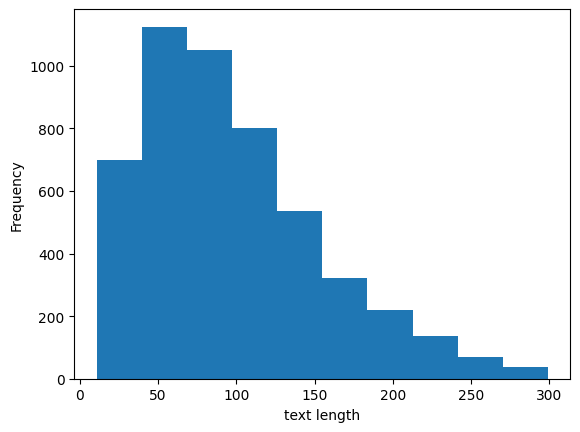

In [15]:
emotion['text'].str.len().plot(kind='hist', xlabel='text length')

In [14]:
emotion['text'].str.len().describe()

count    5000.000000
mean       97.761200
std        56.732216
min        11.000000
25%        53.000000
50%        86.000000
75%       130.000000
max       299.000000
Name: text, dtype: float64

In [19]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())  # Convert text to lowercase

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [word.translate(table) for word in words if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Stemming (uncomment if you want to use stemming)
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    preprocessed_text = ' '.join(lemmatized_words)
    return preprocessed_text

In [21]:
emotion['clean_text'] = emotion['text'].apply(preprocess_text)
emotion['clean_text'][0]

'didnt feel humiliated'

In [22]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(emotion[['clean_text', 'text']], emotion['label'], test_size=0.2, random_state=42)

### Task 2 (Basic ML)

In [24]:
vectorizer = TfidfVectorizer()  # Use TF-IDF vectorizer for text to numerical feature conversion
X_train_vec = vectorizer.fit_transform(X_train['clean_text'])
X_test_vec = vectorizer.transform(X_test['clean_text'])

#### Decision Trees

In [35]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()                   #### try diff params max_depth, min_samples_split, min_samples_leaf
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
clf_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", clf_accuracy)

Decision Tree Accuracy: 0.861


In [39]:
# column_names=list(X_train_vec)
# print(tree.export_text(clf, feature_names = column_names))

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)         ### try different parameters (n_estimators, max_depth, min_samples_split, max_features, bootstrap)
### w/o any parameter, the accuracy is 0.864
### n_estimators=100, max_depth=100, the accuracy is 0.775
### n_estimators=100 the accuracy is 0.844
rf_model.fit(X_train_vec, y_train)
rf_predictions = rf_model.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.844


#### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression modeli
logistic_model = LogisticRegression()           ### try different params (C, max_iter)
logistic_model.fit(X_train_vec, y_train)
logistic_predictions = logistic_model.predict(X_test_vec)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.734


### AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier 

# AdaBoost model
ada_model = AdaBoostClassifier(algorithm='SAMME')       ### try different params (n_estimators, learning_rate)
ada_model.fit(X_train_vec, y_train)
ada_predictions = ada_model.predict(X_test_vec)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print("AdaBoost Accuracy:", ada_accuracy)

AdaBoost Accuracy: 0.314


#### XGBoost

In [45]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBClassifier()          ### try different params (n_estimators, max_depth, learning_rate)
xgb_model.fit(X_train_vec, y_train)
xgb_predictions = xgb_model.predict(X_test_vec)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.846


### KMeans

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)           ### try different params (n_clusters, init, max_iter)
kmeans.fit(X_train_vec)
kmeans_predictions = kmeans.predict(X_test_vec)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)
print("KMeans Accuracy:", kmeans_accuracy)


KMeans Accuracy: 0.105


### Task 3 (Advanced ML)

#### Pre-trained models

In [52]:
from transformers import pipeline

sentiment_analysis = pipeline("sentiment-analysis")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\user\anaconda3\envs\intelsys\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [68]:
from tqdm import tqdm

sentiment_to_label = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
}

trans_y_pred = []
y_test_reset = y_test.reset_index(drop=True)

for test_text in tqdm(X_test['text']):
    result = sentiment_analysis(test_text)
    sentiment = result[0]['label']
    print("sentiment:", sentiment)
    trans_y_pred.append(sentiment_to_label.get(sentiment, 0))  # Default to 6 if sentiment not found

trans_accuracy = accuracy_score(y_test_reset, trans_y_pred)
print("Transformer Accuracy:", trans_accuracy)

100%|██████████| 1000/1000 [00:27<00:00, 36.76it/s]


ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets